# Evaluating Regression Models

In [113]:
import pandas as pd
import numpy as np

# generate our student grade data
df = pd.DataFrame(np.array([[100, 96], [93, 90], [84, 89], [80, 85], [76, 80], [70, 68], [79, 75]]), columns = ['x', 'y'])

x = df['x']
y = df['y']

df.head(3)

,x,y
0,100,96
1,93,90
2,84,89


## What is the Line of Best Fit?

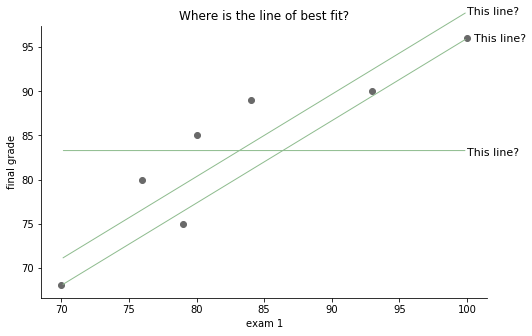

In [114]:
import viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc("axes.spines", top=False, right=False)
viz.evaluation_example1(df, x, y)

## Establish a Baseline

baseline predictions:  $\hat{y} = \bar{y}$

$\bar{y} = \mu_{y} = mean(y)$

In [115]:
df['yhat_bl'] = df['y'].mean()
df.head()

,x,y,yhat_bl
0,100,96,83.285714
1,93,90,83.285714
2,84,89,83.285714
3,80,85,83.285714
4,76,80,83.285714


## Build a Simple Model

In [116]:
from statsmodels.formula.api import ols

ols_model = ols('y ~ x', data=df).fit()

#predict
df['yhat'] = ols_model.predict(x)

df.head()

,x,y,yhat_bl,yhat
0,100,96,83.285714,97.635214
1,93,90,83.285714,91.676524
2,84,89,83.285714,84.015350
3,80,85,83.285714,80.610384
4,76,80,83.285714,77.205418


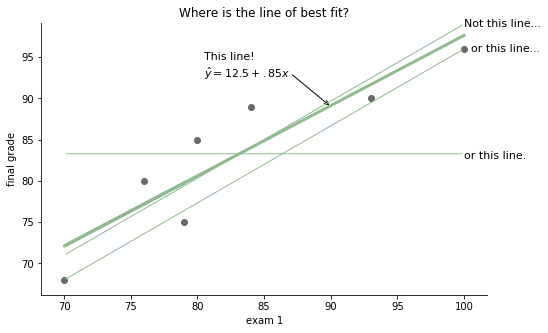

In [117]:
viz.evaluation_example2(df, x, y)

How could we determine which line is best, numerically? We will do that next. 

## Evaluate Part 1: RMSE

### Manually

**Manually Compute Evaluation Metrics**. 

1. Compute the **residual**, or error, for each data point.  
2. Compute the **SSE**, Sum of Squared Errors, a.k.a. **RSS**, Residual Sum of Squares. This is simply squaring each of the errors computed in step one and summing them all together.  
3. Compute the **MSE**, Mean Squared Error. We arrive at this by dividing your SSE by the total number of data points, i.e. the average of your errors that have each been squared.  
4. Compute the **RMSE**, Root Mean Squared Error. Simply take the square root of the MSE.  

#### Residuals

Residuals: for each data point, $(\hat{y} - y)$

In [118]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [119]:
df['residual'] = df['yhat'] - df['y']
df['residual_bl'] = df['yhat_bl'] - df['y']

In [120]:
df.head()

,x,y,yhat_bl,yhat,residual,residual_bl
0,100,96,83.285714,97.635214,1.635214,-12.714286
1,93,90,83.285714,91.676524,1.676524,-6.714286
2,84,89,83.285714,84.015350,-4.984650,-5.714286
3,80,85,83.285714,80.610384,-4.389616,-1.714286
4,76,80,83.285714,77.205418,-2.794582,3.285714


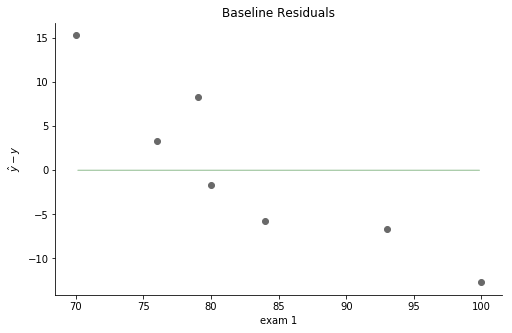

In [121]:
viz.evaluation_example5(df, x, df.residual_bl)

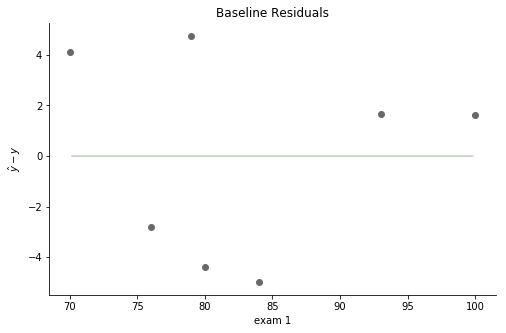

In [122]:
viz.evaluation_example5(df, x, df.residual)

#### SSE

$SSE = \sum_{i=1}^{n}(\hat{y}-y_{i})^2$

In [123]:
df['model_sse'] = sum(df['residual']**2)

sse = sum(df['residual']**2)
df.head()

,x,y,yhat_bl,yhat,residual,residual_bl,model_sse
0,100,96,83.285714,97.635214,1.635214,-12.714286,96.852596
1,93,90,83.285714,91.676524,1.676524,-6.714286,96.852596
2,84,89,83.285714,84.015350,-4.984650,-5.714286,96.852596
3,80,85,83.285714,80.610384,-4.389616,-1.714286,96.852596
4,76,80,83.285714,77.205418,-2.794582,3.285714,96.852596


In [124]:
df['bl_sse'] = sum(df['residual_bl']**2)
sse_bl = sum(df['residual_bl']**2)
df.head()

,x,y,yhat_bl,yhat,residual,residual_bl,model_sse,bl_sse
0,100,96,83.285714,97.635214,1.635214,-12.714286,96.852596,555.428571
1,93,90,83.285714,91.676524,1.676524,-6.714286,96.852596,555.428571
2,84,89,83.285714,84.015350,-4.984650,-5.714286,96.852596,555.428571
3,80,85,83.285714,80.610384,-4.389616,-1.714286,96.852596,555.428571
4,76,80,83.285714,77.205418,-2.794582,3.285714,96.852596,555.428571


#### MSE  

$ MSE = \frac{1}{n}\sum_{i=1}^{n} (\hat{y}-y_{i})^2 $

In [125]:
mse = sse/len(df)

sse = mse * len(df)

In [126]:
mse_bl = sse_bl/len(df)

In [127]:
print("mse: ", mse)
print("mse_bl: ", mse_bl)

mse:  13.836085133827797
mse_bl:  79.34693877551021


#### RMSE  

$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (\hat{y}-y_{i})^2}$

In [128]:
from math import sqrt
rmse = sqrt(mse)
rmse_bl = sqrt(mse_bl)

print("rmse: ", rmse)
print("rmse_bl: ", rmse_bl)

rmse:  3.7196888490608724
rmse_bl:  8.907689867497083


In [129]:
df.describe()

,x,y,yhat_bl,yhat,residual,residual_bl,model_sse,bl_sse
count,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00,7.000000e+00,7.000000
mean,83.142857,83.285714,83.285714,83.285714,3.248195e-14,6.090366e-15,9.685260e+01,555.428571
std,10.270160,9.621405,0.000000,8.742387,4.017723e+00,9.621405e+00,1.534948e-14,0.000000
min,70.000000,68.000000,83.285714,72.097968,-4.984650e+00,-1.271429e+01,9.685260e+01,555.428571
25%,77.500000,77.500000,83.285714,78.482280,-3.592099e+00,-6.214286e+00,9.685260e+01,555.428571
50%,80.000000,85.000000,83.285714,80.610384,1.635214e+00,-1.714286e+00,9.685260e+01,555.428571
75%,88.500000,89.500000,83.285714,87.845937,2.887246e+00,5.785714e+00,9.685260e+01,555.428571
max,100.000000,96.000000,83.285714,97.635214,4.759142e+00,1.528571e+01,9.685260e+01,555.428571


### Scikit-Learn

In [134]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [135]:
df = df[['x','y','yhat_bl','yhat']]
df.head()

,x,y,yhat_bl,yhat
0,100,96,83.285714,97.635214
1,93,90,83.285714,91.676524
2,84,89,83.285714,84.015350
3,80,85,83.285714,80.610384
4,76,80,83.285714,77.205418


In [144]:
rmse2 = sqrt(mse(df.y, df.yhat))
rmse2_bl = sqrt(mse(df.y, df.yhat_bl))

print('RMSE baseline: ', rmse2_bl)
print('RMSE model: ', rmse2)

RMSE baseline:  8.907689867497083
RMSE model:  3.7196888490608724


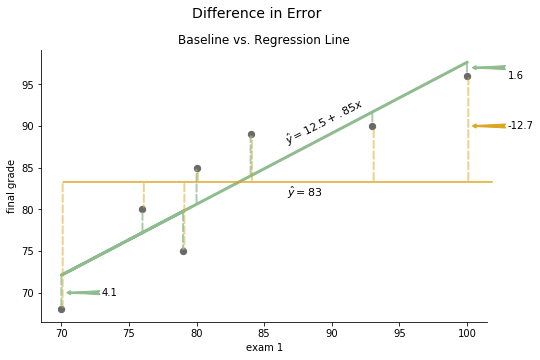

In [145]:
viz.evaluation_example3(df, x, y, yhat = df.yhat)

## Evaluate Part 2: Model Significance

**Use sklearn and statsmodels to evaluate $R^2$**

Compute explained variance, or $R^2$ by using `statsmodels.ols`. 

In [146]:
from statsmodels.formula.api import ols

# remember?  ols_model = ols('y ~ x', data=df).fit()

r2 = ols_model.rsquared
print('R-squared = Explained Variance = ', round(r2,3))

R-squared = Explained Variance =  0.826


In [147]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     23.67
Date:                Thu, 02 Apr 2020   Prob (F-statistic):            0.00461
Time:                        14:49:08   Log-Likelihood:                -19.128
No. Observations:                   7   AIC:                             42.26
Df Residuals:                       5   BIC:                             42.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5111     14.641      0.855      0.432     -25.124      50.146
x              0.8512      0.175      4.866      0.005       0.402       1.301
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.983
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.776
Skew:                           0.124   Prob(JB):                        0.678
Kurtosis:                       1.388   Cond. No.                         737.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Compute $R^2$ using `sklearn.metrics.explained_variance_score`


In [148]:
evs = explained_variance_score(df.y, df.yhat)
print('R-squared = Explained Variance = ', round(evs,3))

R-squared = Explained Variance =  0.826


**Use statsmodels to evaluate the p-value**

In [149]:
f_pval = ols_model.f_pvalue
print("p-value for model significance = ", round(f_pval,4))

p-value for model significance =  0.0046


The tl;dr:

We can conclude that the correlation between the model and the dependent variable is significant. 
Our model is valuable! 

The full explanation: 

For the model with no independent variables, the intercept-only model, all of the model’s predictions equal the mean of the dependent variable. Consequently, if the overall F-test is statistically significant, your model’s predictions are an improvement over using the mean.

- If less than 0.05, you're OK => conclude that your regression model fits the data better than the model with no independent variables, meaning the independent variables in your model improve the fit.   
- If greater than 0.05, it's probably better to stop using this set of features. 

If none of your independent variables are statistically significant, you can expect the overall F-test to also not be statistically significant.   

Occasionally, however, the tests can produce conflicting results. This disagreement can occur because the F-test of overall significance assesses all of the coefficients jointly whereas the t-test for each coefficient examines them individually. For example, the overall F-test can find that the coefficients are significant jointly while the t-tests can fail to find significance individually.   

How can this happen? The F-test sums the predictive power of all independent variables and determines that it is unlikely that all of the coefficients equal zero. However, it’s possible that each variable isn’t predictive enough on its own to be statistically significant. In other words, your sample provides sufficient evidence to conclude that your model is significant, but not enough to conclude that any individual variable is significant.

## Evaluate Part 3: Feature Significance

**The t-test for feature significance**

- **The null hypothesis** states that the model without this variable fits the data as well as your model. (Significance  > 0.05)   

- **The alternative hypothesis** says that your model fits the data better with that independent variable than the model without that variable (Significance F <= 0.05)  

Any independent variable with a p-value of <= 0.05 contributes to a better model than without it.  

In [ ]:
ols_model.summary()

Looking at $P>|t|$ for $x$, we can see a p-value of 0.005. As we would expect in a univariate model, this is basically equivalent to the P(F-statistic), the p-value for the F statistic. 

### Confidence Intervals

**Parameters and confidence intervals**

- 95% CI => 95% of the time the indicated parameter will fall in that range.
- A narrow interval means more confidence in the value presented.
- A wide interval indicates less confidence in the value presented.